In [34]:
import pandas as pd

# Load the dataset from the 'stocks' folder
df = pd.read_csv('archive/stocks/AA.csv')

# Check the first few rows of the dataset
print(df.head())


         Date      Open      High       Low     Close  Adj Close  Volume
0  1962-01-02  6.532155  6.556185  6.532155  6.532155   1.536658   55900
1  1962-01-03  6.532155  6.632280  6.524145  6.632280   1.560212   74500
2  1962-01-04  6.632280  6.664320  6.632280  6.632280   1.560212   80500
3  1962-01-05  6.632280  6.656310  6.616260  6.624270   1.558326   70500
4  1962-01-08  6.608250  6.608250  6.339915  6.408000   1.507450   93800


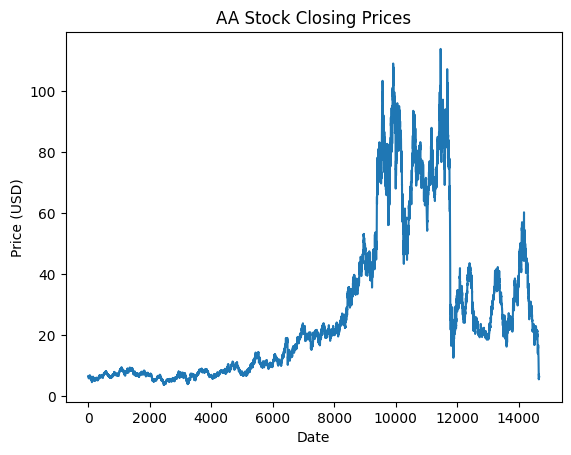

In [46]:
close_prices = df['Close'].values

plt.plot(close_prices)
plt.title('AA Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices.reshape(-1, 1))

def create_sequences(data, time_step=60):
    x_data, y_data = [], []
    for i in range(time_step, len(data)):
        x_data.append(data[i-time_step:i, 0])  
        y_data.append(data[i, 0])  
    return np.array(x_data), np.array(y_data)

x_data, y_data = create_sequences(scaled_data)

x_data = x_data.reshape(x_data.shape[0], x_data.shape[1], 1)

train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [42]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
366/366 [==============================] - 7s 16ms/step - loss: 0.0027 - val_loss: 3.8505e-04
Epoch 2/10
366/366 [==============================] - 5s 13ms/step - loss: 0.0011 - val_loss: 3.1681e-04
Epoch 3/10
366/366 [==============================] - 5s 13ms/step - loss: 9.4915e-04 - val_loss: 2.9664e-04
Epoch 4/10
366/366 [==============================] - 5s 14ms/step - loss: 7.9139e-04 - val_loss: 2.7168e-04
Epoch 5/10
366/366 [==============================] - 5s 13ms/step - loss: 7.7523e-04 - val_loss: 3.4510e-04
Epoch 6/10
366/366 [==============================] - 5s 13ms/step - loss: 6.7540e-04 - val_loss: 1.9187e-04
Epoch 7/10
366/366 [==============================] - 5s 14ms/step - loss: 6.7291e-04 - val_loss: 3.7006e-04
Epoch 8/10
366/366 [==============================] - 5s 13ms/step - loss: 6.6655e-04 - val_loss: 1.7888e-04
Epoch 9/10
366/366 [==============================] - 5s 13ms/step - loss: 6.2002e-04 - val_loss: 2.1430e-04
Epoch 10/10
366/366 [======

92/92 [==============================] - 1s 6ms/step


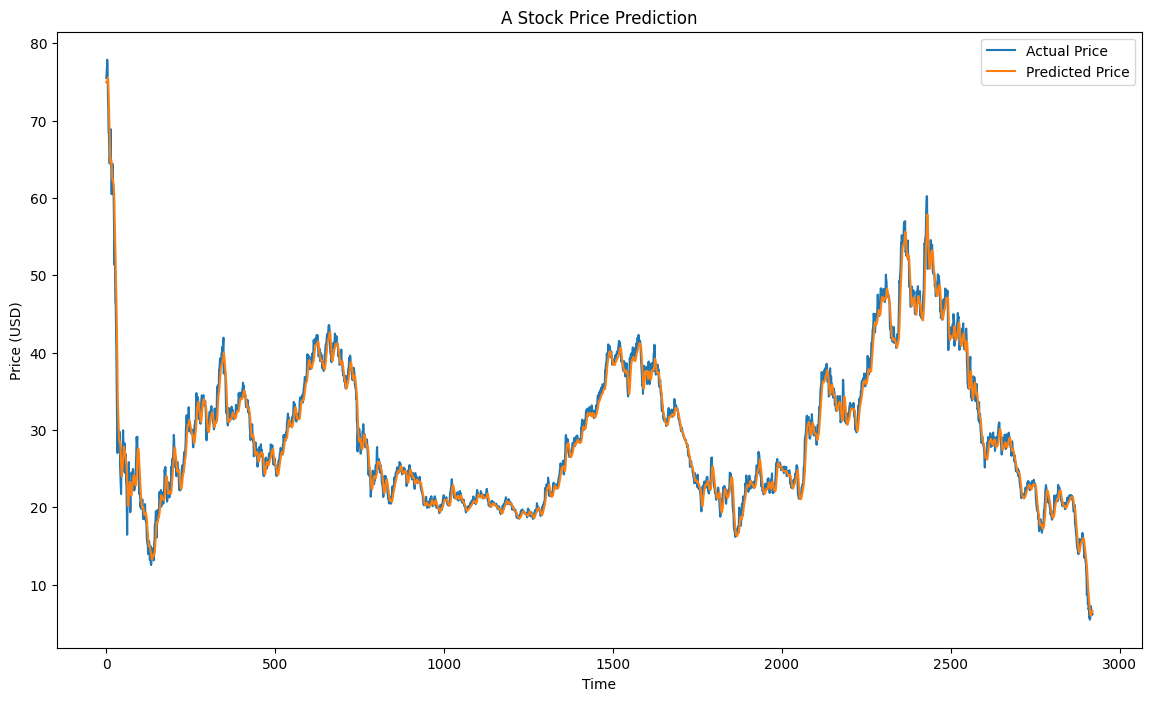

In [43]:
predicted_stock_price = model.predict(x_test)

# Inverse transform to get the real values
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 8))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predicted_stock_price, label='Predicted Price')
plt.title('A Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()